<a href="https://colab.research.google.com/github/nedokormysh/Stepik_data_analysis_R/blob/week_3_stat_part_2/Stepik_data_analysis_R_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 3_1_5

Напишите функцию fill_na, которая принимает на вход данные с тремя переменными:

x_1  -  числовой вектор

x_2 - числовой вектор

y - числовой вектор с пропущенными значениями.

Теперь — ﻿самое интересное. На первом этапе, используя только наблюдения, в которых нет пропущенных значений, мы построим регрессионную модель (без взаимодействий), где  y — зависимая переменная, x_1 и x_2 — независимые переменные. Затем, используя построенную модель, мы заполним пропущенные значения предсказаниями модели.

Функция должна возвращать dataframe c новой переменной  y_full. Сохраните в нее переменную y, в которой пропущенные значения заполнены предсказанными значениями построенной модели.

> test_data <- read.csv("https://stepik.org/media/attachments/course/129/fill_na_test.csv"﻿)
> fill_na﻿(test_data)

   x_1 x_2  y   y_full

1    9  22 14 14.00000

2   14  35  9  9.00000

3   10  45 NA 13.12727

4    6  35 NA 13.30132

5   11  36 16 16.00000

6    5  27 11 11.00000

7    9  34 NA 12.83632

8    6  25 NA 12.90783

9   11  38 13 13.00000

10  12  23 NA 11.97784

In [ ]:
fill_na <- function(df){
  model <- lm(df[,3] ~ df[,1] + df[,2], df, na.action = "na.exclude")
  df$y_full <- ifelse(is.na(df[,3]), predict(model, df[,1:2]), df[,3])
  return(df)
}

fill_na <- function(df){
  model = lm(df[,3] ~ df[,1] + df[,2], df, na.action = "na.exclude")
  df$y_full = ifelse(is.na(df[,3]), predict(model, df), df[,3])
  return(df)
}


In [ ]:
# fill_na <- function(my_df){
# 	fit <- lm(y ~ x_1 + x_2, my_df)
# 	my_df$y_full = ifelse(isna(my_df$y), predict(fit, my_df), my_df$y
# 	return(my_df)}

In [ ]:
fill_na <- function(x){

  r <- lm(y ~ x_1 + x_2, x)
  y_full <- x$y
  predict(r, x)
  NAs <- which(is.na(y_full))
  y_full[NAs] <- predict(r, x)[NAs]
  x$y_full <- y_full
  x
}

In [ ]:
fill_na <- function(x)
  data.frame(x, y_full = ifelse(is.na(x$y), predict(lm(y ~ x_1 + x_2, x), x), x$y))

# 3_1_6

В переменной df сохранен subset данных mtcars только с переменными "wt", "mpg", "disp", "drat", "hp". Воспользуйтесь множественным регрессионным анализом, чтобы предсказать вес машины (переменная "wt"). Выберите такую комбинацию независимых переменных (из "mpg", "disp", "drat", "hp"), чтобы значение R^2 adjusted было наибольшим. Взаимодействия факторов учитывать не надо.

Выполните все операции по сравнению моделей на вашем компьютере.
В поле для ответа сохраните в переменную  model регрессионную модель с оптимальной комбинацией предикторов!

In [ ]:
df <- mtcars[,c('wt', 'mpg', 'disp', 'drat', 'hp')]
head(df)

,wt,mpg,disp,drat,hp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,2.620,21.0,160,3.90,110
Mazda RX4 Wag,2.875,21.0,160,3.90,110
Datsun 710,2.320,22.8,108,3.85,93
Hornet 4 Drive,3.215,21.4,258,3.08,110
Hornet Sportabout,3.440,18.7,360,3.15,175
Valiant,3.460,18.1,225,2.76,105


In [ ]:
summary(lm(wt ~ mpg + disp + drat + hp, df))


Call:
lm(formula = wt ~ mpg + disp + drat + hp, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55894 -0.24694 -0.05119  0.28431  0.90541 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.364821   0.963395   4.531 0.000107 ***
mpg         -0.079981   0.024787  -3.227 0.003272 ** 
disp         0.005085   0.001318   3.857 0.000645 ***
drat        -0.054984   0.206363  -0.266 0.791922    
hp          -0.003519   0.001914  -1.839 0.076967 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3945 on 27 degrees of freedom
Multiple R-squared:  0.8584,	Adjusted R-squared:  0.8374 
F-statistic: 40.92 on 4 and 27 DF,  p-value: 4.359e-11


In [ ]:
model <- lm(wt ~ mpg + disp + hp, df)

In [ ]:
df1 <- mtcars[,c("wt", "mpg", "disp", "drat", "hp")]
fit_full <- lm(wt ~ ., data = df1)
optimal_fit <-  step(fit_full, direction = 'backward')
opt_summary <- summary(optimal_fit)
attr(as.formula(opt_summary), "term.labels")

Start:  AIC=-54.96
wt ~ mpg + disp + drat + hp

       Df Sum of Sq    RSS     AIC
- drat  1   0.01105 4.2136 -56.877
<none>              4.2026 -54.961
- hp    1   0.52629 4.7289 -53.186
- mpg   1   1.62066 5.8232 -46.524
- disp  1   2.31588 6.5185 -42.915

Step:  AIC=-56.88
wt ~ mpg + disp + hp

       Df Sum of Sq    RSS     AIC
<none>              4.2136 -56.877
- hp    1    0.6684 4.8820 -54.166
- mpg   1    1.9125 6.1261 -46.902
- disp  1    3.1058 7.3195 -41.206


[1] "mpg"  "disp" "hp"

In [ ]:
model <- lm(wt ~ mpg + disp + hp, df)
d <- step(model, direction = 'backward', SCALE=1)

# 3_2_7

Воспользуйтесь встроенным датасетом attitude, чтобы предсказать рейтинг (rating) по переменным complaints и critical. Каково t-значение для взаимодействия двух факторов?

Разделителем целой и дробной части в ответе должна быть запятая!

In [14]:
fit <- lm(rating ~ complaints*critical, attitude)
summary(fit)


Call:
lm(formula = rating ~ complaints * critical, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1988  -6.2054   0.3718   6.1426   9.6796 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)         26.923536  41.643872   0.647    0.524
complaints           0.551382   0.649862   0.848    0.404
critical            -0.181353   0.595686  -0.304    0.763
complaints:critical  0.002907   0.009192   0.316    0.754

Residual standard error: 7.243 on 26 degrees of freedom
Multiple R-squared:  0.6825,	Adjusted R-squared:  0.6459 
F-statistic: 18.63 on 3 and 26 DF,  p-value: 1.169e-06


In [18]:
fit <- lm(rating ~ complaints*critical, attitude)
summary(fit)$coefficients[4,3]

[1] 0.3163015

# **Памятка по интерпретации результатов регрессионного анализа с категориальными и непрерывными переменными**
Модель для примера:

DV ~ IV_numeric * IV_categorical

IV_categorical - фактор с двумя уровнями (Level1 и Level2)

Коэффициенты:

Intercept — предсказанное значение DV для первого уровня IV_categorical с учётом того, что IV_numeric равна нулю.

IV_numeric — насколько изменяется предсказанное значение DV при увеличении IV_numeric на одну единицу в группе, соответствующей первому уровню IV_categorical

IV_categoricalLevel2 — насколько изменяется предсказанное значение DV при переходе от первого уровня IV_categorical ко второму уровню. С учётом того, что IV_numeric равна нулю.

IV_numeric:IV_categoricalLevel2 — насколько сильнее (или слабее) изменяется предсказанное значение DV при увеличении IV_numeric на одну единицу в группе, соответствующей второму уровню IV_categorical, по сравнению с первым уровнем.

Как предсказывать значения в новом датасете на основе полученных коэффициентов

1). Предположим у нас есть новый объект, про который мы знаем, что он принадлежит к группе, соответствующей IV_categorical (Level1) и измеренный у него IV_numeric составил 10:

Предсказанное значение DV = Intercept + 10 * IV_numeric

2). Предположим у нас есть новый объект, про который мы знаем, что он принадлежит к группе, соответствующей IV_categorical (Level2) и измеренный у него IV_numeric составил 6:

Предсказанное значение DV = Intercept + IV_categoricalLevel2 + 6 * (IV_numeric + IV_numeric:IV_categoricalLevel2)


# 3_2_12

В этом примере будем работать с хорошо вам известным встроенным датасетом mtcars. Переменная am говорит о том, какая коробка передач используется в машине: 0 - автоматическая, 1 - ручная.

Сделаем эту переменную факторной.
mtcars$am <- factor(mtcars$am, labels = c('Automatic', 'Manual'))

Теперь постройте линейную модель, в которой в качестве зависимой переменной выступает расход топлива (mpg), а в качестве независимых - вес машины (wt) и коробка передач (модифицированная am), а также их взаимодействие. Выведите summary этой модели.

Что отражает значение intercept в данной модели?

In [21]:
mtcars$am <- factor(mtcars$am, labels = c('Automatic', 'Manual'))

model <- lm(mpg ~ am * wt, mtcars)
summary(model)


Call:
lm(formula = mpg ~ am * wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6004 -1.5446 -0.5325  0.9012  6.0909 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.4161     3.0201  10.402 4.00e-11 ***
amManual     14.8784     4.2640   3.489  0.00162 ** 
wt           -3.7859     0.7856  -4.819 4.55e-05 ***
amManual:wt  -5.2984     1.4447  -3.667  0.00102 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.591 on 28 degrees of freedom
Multiple R-squared:  0.833,	Adjusted R-squared:  0.8151 
F-statistic: 46.57 on 3 and 28 DF,  p-value: 5.209e-11


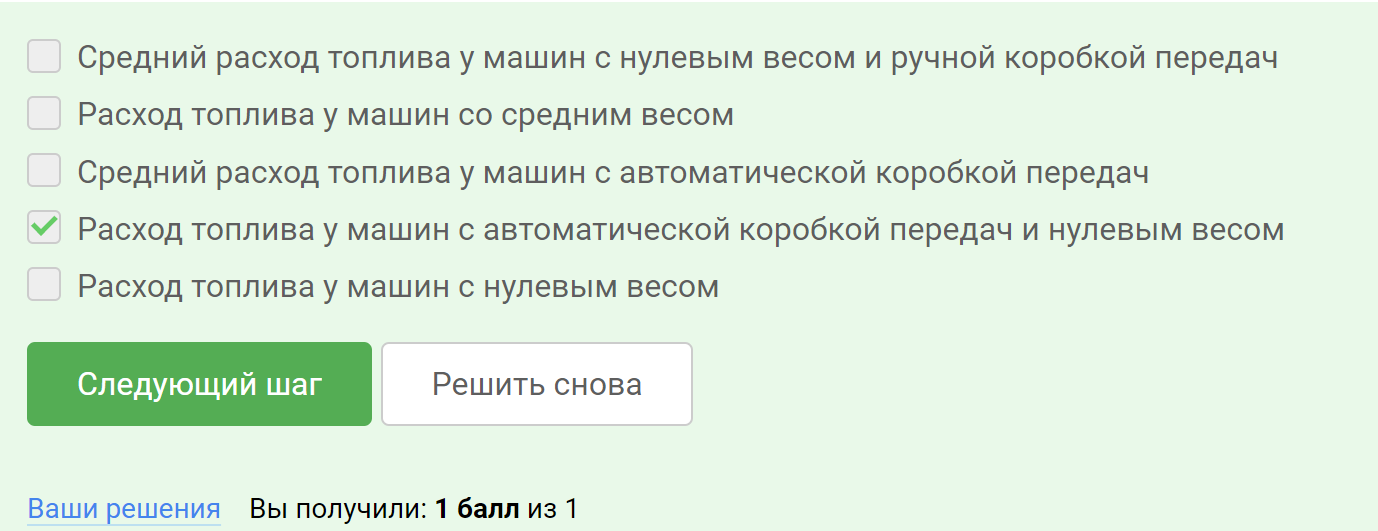

# 3_2_13

В этой задаче снова нужно использовать модель из предыдущей задачи и её summary.

Какие утверждения мы можем сделать на основе данной модели?

Обратите внимание на то, что чем выше значение mpg (miles per gallon), тем ниже будет расход топлива (на одном галлоне бензина машина сможет проехать большее).

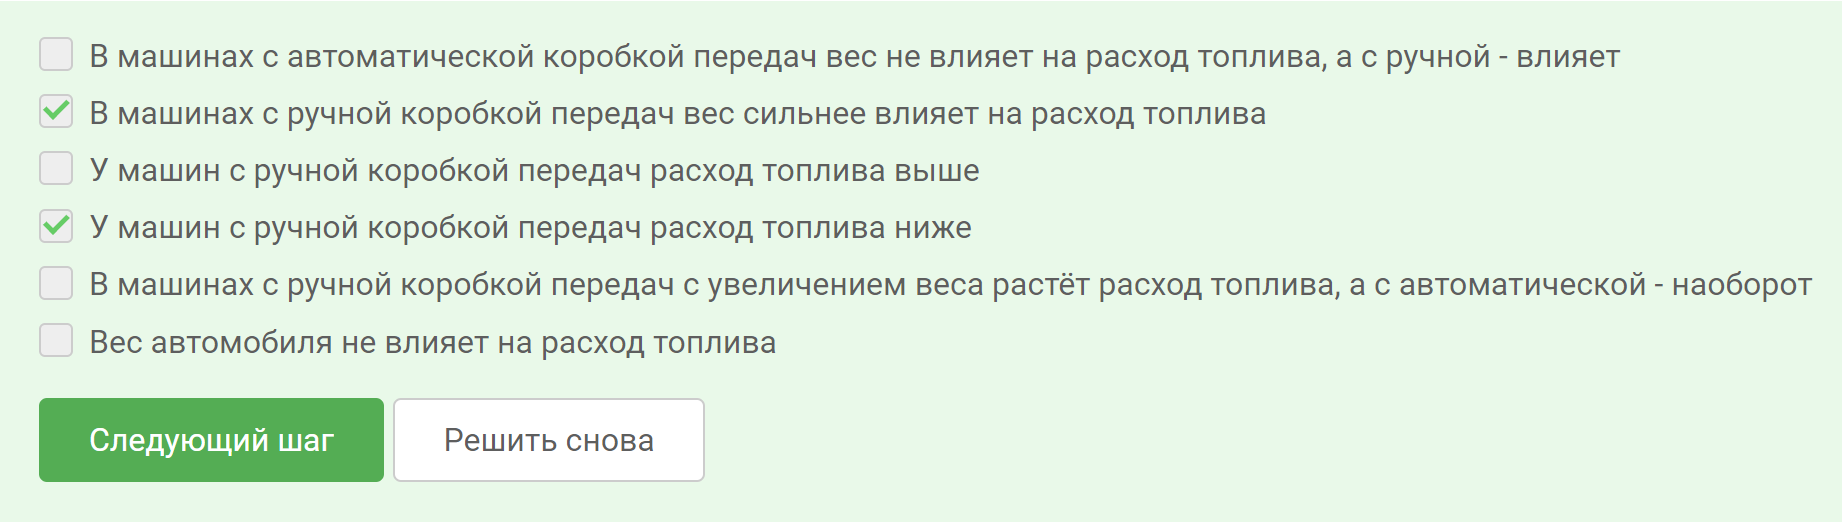

# 3_2_15

Визуализируйте взаимодействие переменных wt и am, дополнив код, приведённый в задании:
Ось x - переменная wt
Ось y - переменная mpg
Цвет регрессионных прямых - переменная am

У вас должно получиться следующее изображение:

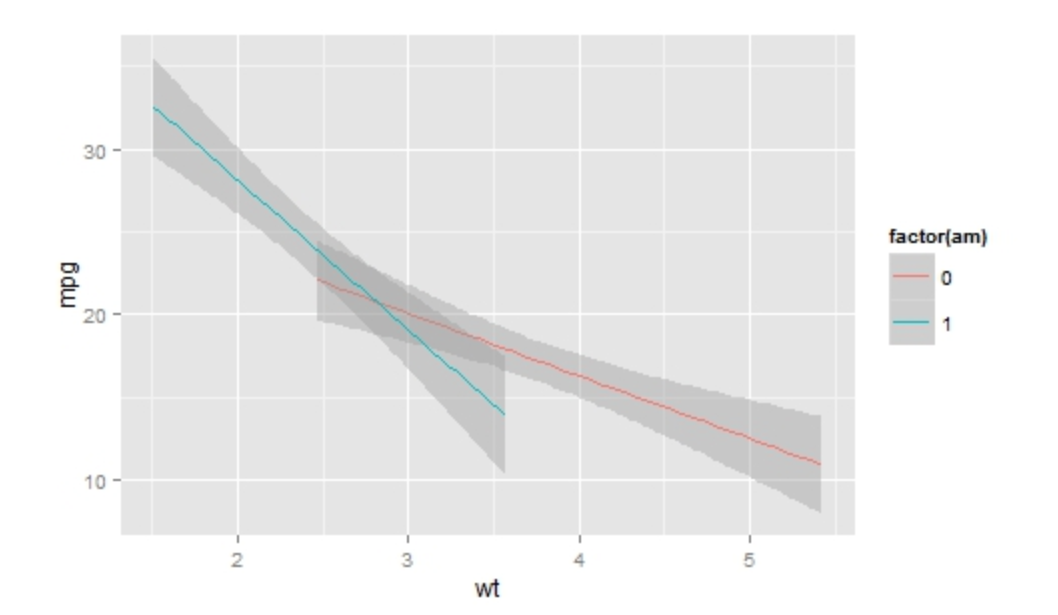

`geom_smooth()` using formula = 'y ~ x'


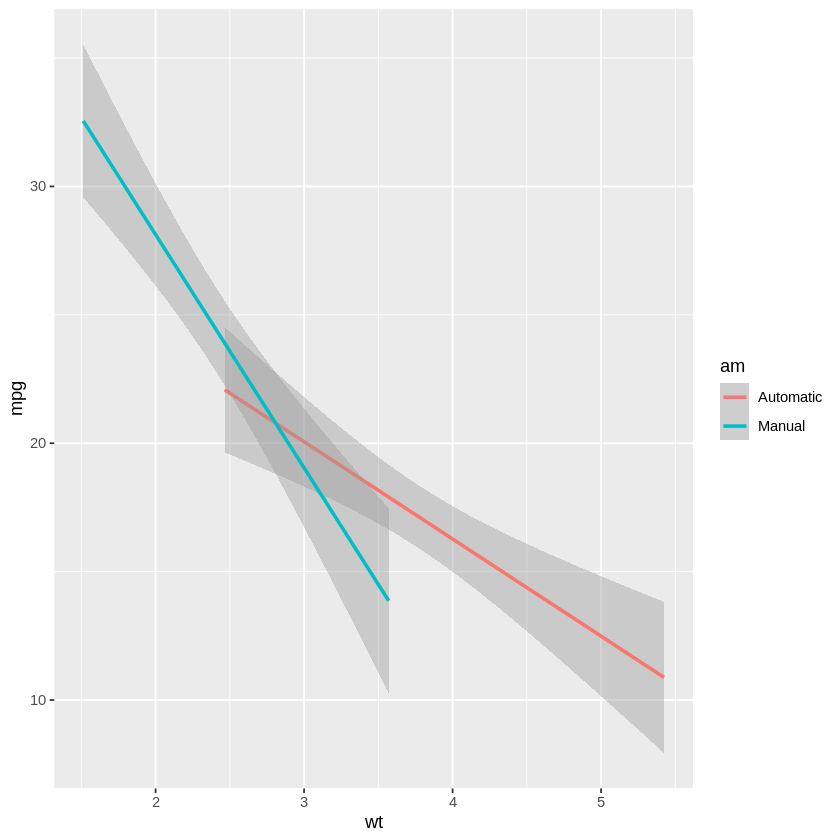

In [26]:
# сначала переведем переменную am в фактор
mtcars$am <- factor(mtcars$am)

# теперь строим график
my_plot <- ggplot(mtcars, aes(x = wt, y = mpg, col = am)) +
  # geom_point() +
  geom_smooth(method = 'lm')

my_plot

In [ ]:
# Python:



# import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns


# df = pd.DataFrame(pd.read_csv('mtcart.csv'))

# g = sns.lmplot(data=df, x='wt', y='mpg', hue='am', scatter=False)

# new_labels = ['Auto', 'Manual']
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)

# plt.show()